<a href="https://colab.research.google.com/github/phmehta95/MedicalPhysicsMSc/blob/main/Session_3_Numpy_Arrays_and_matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python modules

One of the features of Python that makes it so useful is the large number of *modules* available to extend its core functionality. We're already encountered the `functools` module (to access the `partial()` function). On this course, we'll also make use of:
- the `numpy` module to handle multidimensional data arrays, linear algebra, Fourier transforms, etc.
- the `matplotlib` module to display various types of plots
- the Scikit `skimage` module to handle operations on images
- the `pandas` module to handle structured data tables and perform statistics

We'll introduce each of these in turn. But first, a few words about how to handle modules.

## Importing modules

To access the functionality within a module, we need to ask Python to load them in and make them available. This is done with the `import` keyword, which can be used in a number of ways.

The simplest way is to import the module wholesale:
```
import numpy
```
We can then access specific functions and variables using the [dot notation](https://www.google.com/url?q=https%3A%2F%2Fbuiltin.com%2Fdata-science%2Fdot-notation):

```
print (numpy.zeros(3))
```

## Partial import

In many cases, you will only need a few specific functions from a specific module, in which case importing the entire module may be unnecessary. In this case, we can request that only specific functions be imported using the syntax:
```
from module import func
```

For example, this loads the `localtime()` function from the standard Python `time` module.


In [74]:
from time import localtime

print (localtime())

time.struct_time(tm_year=2025, tm_mon=10, tm_mday=2, tm_hour=11, tm_min=28, tm_sec=40, tm_wday=3, tm_yday=275, tm_isdst=0)


Note that the `localtime()` function is now available directly - not as `time.localtime()` as would have been the case with a single `import` statement.

## Submodules

Large modules often split up their functionality into distinct submodules to make them easier to manage. For example, `numpy` [contains multiple submodules](https://numpy.org/doc/stable/reference/module_structure.html) to handle Fourier transforms, linear algebra, random numbers, etc. These can be imported using the single `import` statement:
```
import numpy.fft
```
at which point the functionality contained in that submodule will be accessible using the `numpy.fft` prefix, for example:
```
numpy.fft.ifft(x)
```

Alternatively, we can use the `from` statement as above, but this time to import the *submodule* rather than a single function:
```
from numpy import fft
```
at which point the functionality will be accessible using the `fft` prefix:
```
fft.ifft(x)
```

Finally, if desired we can import a selection of functions as necessary:
```
from numpy.fft import fft, ifft
```
at which point these functions become available without the need for any prefix:
```
ifft(x)
```


## Using an alias

If we use these modules a lot, it does sometimes make sense to import the module under a different *alias*, using this syntax:
```
import module as alias
```

In fact, this is the recommended way to import the `numpy` module:
```
import numpy as np
```
at which point the functionality is accessible under the `np` prefix:
```
print (np.zeros(3))
```

These different ways of importing modules can all be combined in different ways, for example:
```
from numpy.random import noncentral_chisquare as dist
```
which imports the `noncentral_chisquare()` function from the `random` submodule of `numpy`, and makes it available under the alias `dist()`.

Note that while there is a great deal of flexibility in how you can handle your modules, it's often best to keep things simple and rely on each module's documented conventions as much as possible. This will minimise nasty surprises for you and anyone else looking at your code in the future...

# numpy arrays

Perhaps the most fundamental data structure in any programming language is the [array](https://www.w3schools.com/programming/prog_arrays.php). In Python, an array is a bit like a list. The main advantage of an array is the speed of access. The main advantage of a list is that it can store data of different types. In Python, we have a library called [NumPy](https://numpy.org/), which provides methods for array operations. For data science, NumPy is essential.

To use numpy arrays, we first need to import the `numpy` module. By convention, this is imported as `np`:

In [2]:
import numpy as np

## Array creation

There are methods to create arrays, initialised in different ways. For example, we can create a numpy array containing zeros:

In [75]:
arr = np.zeros(20,)
print (arr)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


... or ones:


In [76]:
arr = np.ones(20,)
print (arr)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


We can also create an array of uninitialised values, which won't be set to any specific value. The values in the array will be unpredictable, and may change every time the program is run - but it can be faster to create if you don't care about the initial values:

In [5]:
arr = np.empty(20,)
print (arr)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


We can query the shape of the array - note that this is *not* a method, we are querying the `shape` attribute directly:


In [6]:
arr.shape

(20,)

We can change the array from a single row to a single column using the `reshape()` method:

In [7]:
arr = arr.reshape(20,1)
print (arr)

[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]


We can change the shape of the array, for example to 5 rows and 4 columns:

In [8]:
arr = arr.reshape(5,4)
print (arr)

[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]


We can create an array from a list of numbers:

In [9]:
list_numbers = [1, 2, 3, 4, 5]

arr = np.array (list_numbers)
print (arr)

[1 2 3 4 5]


This can also be used to create 2D arrays, by providing *nested* lists of numbers:

In [10]:
list_numbers = [ [1,2,3,4,5], [6,7,8,9,10] ]

arr = np.array (list_numbers)
print (arr)

[[ 1  2  3  4  5]
 [ 6  7  8  9 10]]


This also works for more than 2 dimensions:


In [11]:
list_numbers = [ [ [1,2], [3,4] ], [ [5,6], [7,8] ] ]

arr = np.array (list_numbers)

print (f'{arr.ndim}D array of size {arr.shape}')
print (arr)

3D array of size (2, 2, 2)
[[[1 2]
  [3 4]]

 [[5 6]
  [7 8]]]


There are also convenience functions to create an array of series of numbers with equal intervals. In this example, we create an array with 9 elements from 0 → 2π (note that the constant π is provided as `np.pi`):



In [12]:
arr = np.linspace (0, 2*np.pi, 9)
print (arr)

[0.         0.78539816 1.57079633 2.35619449 3.14159265 3.92699082
 4.71238898 5.49778714 6.28318531]


## Random numbers

The `numpy` module also provides the `random` submodule, which can be used to generate arrays of random numbers:

In [13]:
arr = np.random.randint (0, 5, size=6)
print (arr)

[3 3 0 3 1 2]


If necessary, we can set the *seed* for the random number generator, which will ensure we get the same run of random numbers every time:

In [14]:
np.random.seed (10)
arr=np.random.randint (0, 5, size=6)
print (arr)

[1 4 0 1 3 4]


## Accessing array elements

To access individual elements on the array, we can use the square bracket operator:

In [15]:
arr[0]

np.int64(1)

In [16]:
arr[1]

np.int64(4)

As with lists and tuples, we can access the last element using negative indexing:


In [17]:
arr[-1]

np.int64(4)

We can access a *range* of elements using the colon `:` in the index. For example, this produces the first 2 elements in `arr`:


In [18]:
arr[0:2]

array([1, 4])

We can also provide an *increment* when indexing, after a second colon. This example provides every other element:

In [19]:
arr[::2]

array([1, 0, 3])

Same thing, starting at element 1:


In [20]:
arr[1::2]

array([4, 1, 4])

## Operators

We can use the standard operators to perform element-wise operations.


For example, let's start with two vectors of size 10, filled with random numbers from the Normal distribution:


In [21]:
x = np.random.randn (10)
y = np.random.randn (10)

We can add them:

In [22]:
x+y

array([-2.51046596,  1.01989023,  0.8499661 , -0.27494795, -0.87109063,
        0.2436854 ,  1.48882843, -1.2544051 , -1.54470209, -0.54033492])

subtract them:

In [23]:
x-y

array([-0.58033462, -1.03665793,  0.39270584, -1.16522317,  1.4021138 ,
       -0.02658835, -1.48024557,  0.90520468,  2.41075447,  2.94640967])

multiply them element-by-element:

In [24]:
x*y

array([ 1.49141277, -0.0086209 ,  0.14205612, -0.32053717, -0.30178106,
        0.01466891,  0.00637079,  0.18853416, -0.85640814, -2.09734203])

and divide them element-by-element:

In [25]:
x/y

array([ 1.6013421 , -0.00815332,  2.71764694, -1.61766955, -0.23360115,
        0.80324873,  0.00289075,  0.16169607, -0.21895131, -0.69006338])

Of course, this also works for >1D arrays:

In [26]:
x = np.random.randn (3,4)
y = np.random.randn (3,4)

x+y

array([[ 1.57454324,  2.57998061,  1.52390124,  1.33498988],
       [ 1.35562148,  0.66602688,  0.38898356,  0.26233229],
       [-1.20675055, -1.03864623, -0.67188285, -0.68883965]])

We can also apply logical operators to arrays, which produces an array of boolean (true/false) values:

In [27]:
x+y > 1

array([[ True,  True,  True,  True],
       [ True, False, False, False],
       [False, False, False, False]])

## Broadcasting

A very useful feature in `numpy` is *broadcasting* (so useful that this has since been taken up by Matlab). This allows element-wise operations to be performed even if the dimensions do not match, as long as the mismatched axis has size one for one of the two arrays.

The simplest example of that is multiplying an array by a simple scalar, which as expected multiplies every element in the array by the scalar value:

In [28]:
x = np.array ([ 1, 2, 3, 4, 5 ])
print (2.3 * x)

[ 2.3  4.6  6.9  9.2 11.5]


This becomes more interesing when for example, multiplying a row vector with a matrix: as long as the number of columns matches, `numpy` will implicitly *replicate* the row vector for each row of the matrix:

In [29]:
v = np.linspace (1, 5, 5)
M = np.linspace (0,9,10).reshape (2,5)

print (v)
print (M)
print (v+M)

[1. 2. 3. 4. 5.]
[[0. 1. 2. 3. 4.]
 [5. 6. 7. 8. 9.]]
[[ 1.  3.  5.  7.  9.]
 [ 6.  8. 10. 12. 14.]]


This is *very* useful trick, and can work along any dimension. Here is an example with a row vector and column vector - note that this is *not* a vector-vector multiply (dot product). It remains an element-wise operation, with broadcasting now happening along *both* axes:

In [30]:
r = np.arange (1,5)
c = np.reshape (np.arange (1,4), newshape=(-1, 1))

print (r)
print (c)
print (r*c)

[1 2 3 4]
[[1]
 [2]
 [3]]
[[ 1  2  3  4]
 [ 2  4  6  8]
 [ 3  6  9 12]]


In the above `reshape()` call, note the use of the `-1` for the shape of the new vector: this means `numpy` will have to work out what size this axis should be based on the other axes and the size of the input.

### Exercise 1

Without using any explicit `for` loops, compute an array `M` of size 5×12 where each element corresponds to:
$$
M(i,j) = \sin\left({\frac{i}{12 \pi}}\right) \times (1+0.3\times j )
$$

> 💡 *Tip:* use broadcasting!


In [77]:
import numpy as np

# Define the row and column indices
i = np.arange(1, 6).reshape(-1, 1)  # shape (5, 1)
j = np.arange(1, 13).reshape(1, -1) # shape (1, 12)

# Compute M using broadcasting
M = np.sin(i / (12 * np.pi)) * (1 + 0.3 * j)

print(M)

[[0.03447953 0.04243634 0.05039316 0.05834997 0.06630678 0.0742636
  0.08222041 0.09017723 0.09813404 0.10609085 0.11404767 0.12200448]
 [0.0689348  0.08484283 0.10075085 0.11665888 0.13256691 0.14847494
  0.16438297 0.180291   0.19619903 0.21210706 0.22801509 0.24392312]
 [0.10334156 0.12718962 0.15103767 0.17488572 0.19873377 0.22258183
  0.24642988 0.27027793 0.29412599 0.31797404 0.34182209 0.36567014]
 [0.13767562 0.16944692 0.20121822 0.23298951 0.26476081 0.29653211
  0.3283034  0.3600747  0.391846   0.4236173  0.45538859 0.48715989]
 [0.17191281 0.211585   0.25125719 0.29092938 0.33060157 0.37027375
  0.40994594 0.44961813 0.48929032 0.5289625  0.56863469 0.60830688]]


## Mathematical functions

`numpy` provides a wide range of functions that be applied to the array element-by-element, for example:


In [78]:
arr1 = np.sin (arr)
print (arr1)

[0.84147098 0.84147098 0.84147098 0.84147098 0.84147098 0.84147098
 0.84147098 0.84147098 0.84147098 0.84147098 0.84147098 0.84147098
 0.84147098 0.84147098 0.84147098 0.84147098 0.84147098 0.84147098
 0.84147098 0.84147098]


There are many functions available in `numpy`. [See here for the full list](https://numpy.org/doc/stable/reference/routines.math.html).

Most of these functions operate on each voxel independently, but some operate over the whole array. For example:

In [79]:
x = np.random.randint (0,10, (3,4))
print (x)

print (f'\nsum over the whole array = {np.sum(x)}')

[[4 0 3 1]
 [7 0 3 7]
 [4 4 2 1]]

sum over the whole array = 36


Many of these can also operate *per axis* of the array, if the axis is specified. For example:

In [80]:
print (f'sum along axis 0 = {np.sum(x, axis=0)}')

sum along axis 0 = [15  4  8  9]


## Linear algebra

`numpy` provides [linear algebra functionality](https://numpy.org/doc/stable/reference/routines.linalg.html) for matrix operations, such as matrix multiplication, matrix inversion, solving matrix systems of equations, and many different types of matrix decomposition, including QR, LU, eigenvalue and Singular Value Decomposition.

The `matmul()` function performs matrix multiplication:

In [81]:
a = np.reshape (np.arange(10), newshape=(2,5))
b = np.reshape (np.arange(10), newshape=(5,2))

print (f'matrix a has size {a.shape} and contents =\n{a}')
print (f'matrix b has size {b.shape} and contents =\n{b}')

print (f'the product a×b has size {np.matmul(a,b).shape}) and contents = \n{np.matmul (a,b)}')

matrix a has size (2, 5) and contents =
[[0 1 2 3 4]
 [5 6 7 8 9]]
matrix b has size (5, 2) and contents =
[[0 1]
 [2 3]
 [4 5]
 [6 7]
 [8 9]]
the product a×b has size (2, 2)) and contents = 
[[ 60  70]
 [160 195]]


The `np.solve()` method can be used to solve a system of equations. For example:

In [82]:
M = np.random.randn (5,5)
y = np.random.randn(5,1)

print (f'M = \n{M}')
print (f'y = \n{y}')

# Solve for x in the equation M*x = y:
x = np.linalg.solve (M, y)
print (f'\nsolution of M*x = y is x = \n{x}')

# verify by comparing M*x with y:
print (f'\nVerifying by printing M*x (first column), y (second column) and their difference (last column):')
print (f'{np.concatenate ((np.matmul(M,x), y, np.matmul(M,x)-y), axis=1)}')

M = 
[[-0.88394076  1.01188674  0.35319289  0.16833016  0.46907863]
 [-1.78407762  0.28407538 -1.31809877  0.5130512   0.64310928]
 [ 0.06699362  0.63580774  0.7015887   1.94635789 -0.15564969]
 [-0.94750314 -0.28805438 -0.84790913 -0.82790578  1.63327349]
 [-0.11896339  0.73496135 -0.8447358  -0.80560955 -0.69499449]]
y = 
[[-0.31718227]
 [ 0.83837991]
 [ 0.41224412]
 [-0.3871235 ]
 [ 0.52130952]]

solution of M*x = y is x = 
[[ 0.03149838]
 [ 0.04776821]
 [-0.681117  ]
 [ 0.41224556]
 [-0.35495812]]

Verifying by printing M*x (first column), y (second column) and their difference (last column):
[[-3.17182274e-01 -3.17182274e-01  1.11022302e-16]
 [ 8.38379909e-01  8.38379909e-01  0.00000000e+00]
 [ 4.12244119e-01  4.12244119e-01  0.00000000e+00]
 [-3.87123500e-01 -3.87123500e-01 -5.55111512e-17]
 [ 5.21309522e-01  5.21309522e-01  1.11022302e-16]]


There are many other methods available for linear algebra, refer to [the documentation](https://numpy.org/doc/stable/reference/routines.linalg.html) for a more complete listing.

## Fourier transforms

Fourier analysis is an essential tool for any signal processing, and again, `numpy` provides many [functions to do basic Fourier analysis](https://numpy.org/doc/stable/reference/routines.fft.html).

To illustrate, let's start with a simple time signal containing white noise:

In [37]:
signal = np.random.randn (1024)

We can plot this using `matplotlib` (we'll see more about this later on in this session):

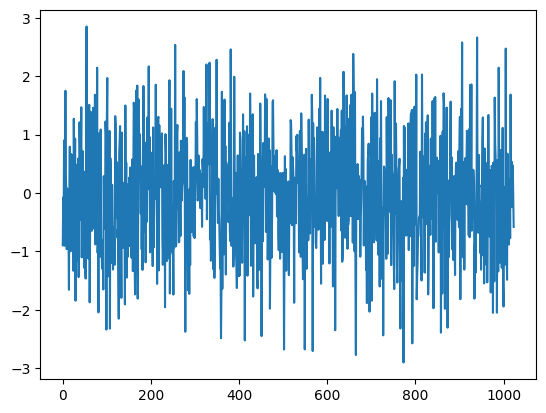

In [38]:
import matplotlib.pyplot as plt
plt.plot (signal);

We can compute the Fourier transform of this signal using the `np.fft.fft()` function, and plot the resulting spectrum:

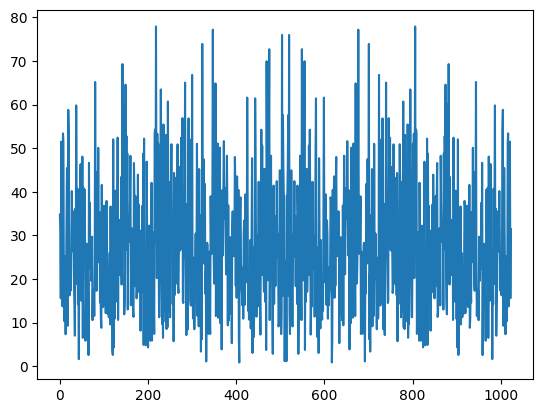

In [39]:
signal_ft = np.fft.fft (signal)
plt.plot (np.abs(signal_ft));

We can see that the Fourier transform of white noise is also essentially white noise.

We can apply a frequency filter, for example by multiplying with a Gaussian:

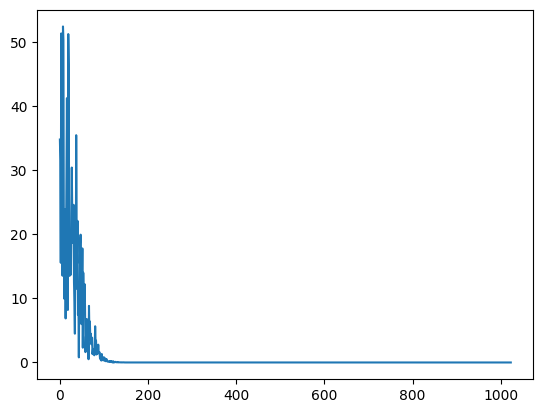

In [40]:
signal_ft_filtered = signal_ft * np.exp (-np.linspace(0,20,signal_ft.shape[0])**2)
plt.plot (np.abs(signal_ft_filtered));

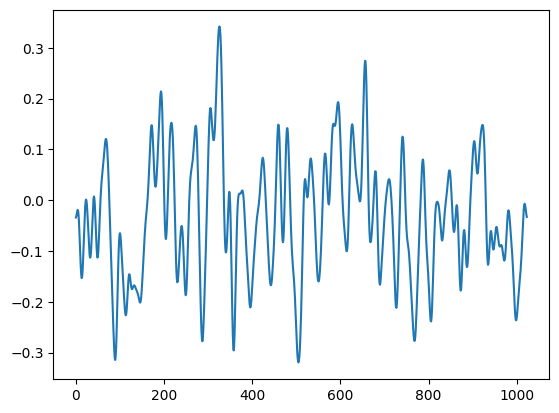

In [41]:
signal_filtered = np.fft.ifft (signal_ft_filtered)
plt.plot (signal_filtered.real);

### Exercise 2

Compute the Fourier transform of a rectangular pulse:
$$
S(t) = \begin{cases} 1 & |t| < 1 \\ 0 & \textrm{otherwise} \end{cases}
$$
Compute the input signal *S(t)* with 200 values spread over the interval [ -20, 20 ), and store the Fourier transform in a variable called `F` to allow the pre-filled last line in the code below to display your result.

> 💡 *Tip:* use the [numpy `heavyside()` function](https://numpy.org/doc/2.1/reference/generated/numpy.heaviside.html). You will also need to use the FFT [fftshift](https://numpy.org/doc/stable/reference/generated/numpy.fft.fftshift.html) and [ifftshift](https://numpy.org/doc/stable/reference/generated/numpy.fft.ifftshift.html) functions to zero-centre the signal before and after the Fourier transform.

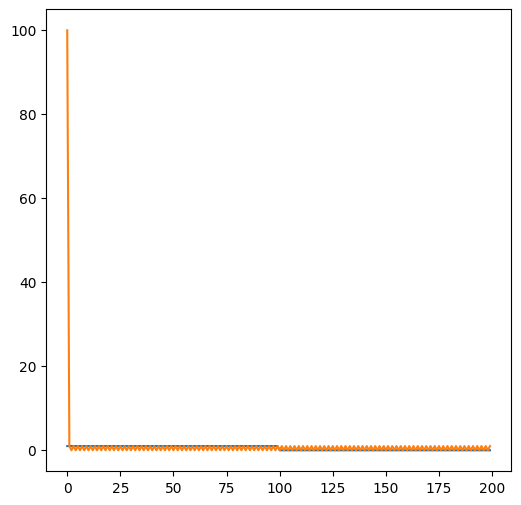

In [99]:
signal_rectangular = np.heaviside(np.linspace(-20, 20, 200), 1)
plt.plot(np.fft.fftshift(signal_rectangular))
F = np.fft.fft(np.fft.ifftshift(signal_rectangular))

# uncomment the line below to visualise what your code produced:
plt.plot (F.real);

## Statistics

We often need to compute summary statistics from our data, such as mean, standard deviation, etc. `numpy` provides many functions for these purposes, which you can learn about in [the documentation](https://numpy.org/doc/stable/reference/routines.statistics.html).

We can for example compute the mean and standard deviation of an array of values:

In [101]:
# generate some fake noisy data:
data = 1.2 + np.random.randn (12)

print (f'mean = {np.mean (data)}, standard deviation = {np.std (data)}')

mean = 0.8537250460338143, standard deviation = 0.9516550433556765


For more advanced statistics, you can use more specialised modules such as the [`statsmodels` package](https://www.statsmodels.org/stable/index.html). You will learn about this in the second year of this course!

## File input and output

A fundamental aspect of processing data is loading and saving data from & to files. Python provides ways to do this, and `numpy` builds on these to load and save `numpy` arrays ([see the full documentation online](https://numpy.org/doc/stable/reference/routines.io.html)). Furthermore, the Google Colab environment provides additional ways to make the data accessible, so that we can load it directly into Python.

To illustrate, we will create a 2D array of random data, and save it to a text file:

In [102]:
data = np.random.randn (10,20)

np.savetxt ('mydata.txt', data)

We can verify that the file has indeed been created using the file explorer functionality provided within Google Colab. Click on the folder icon on the right hand side toolbar, and check that the `mydata.txt` file has indeed been created.

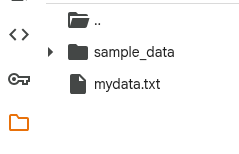

We can also list the contents of the current folder (referred to using the shortcut `.`) within Python, using the `os.listdir()` function in [the `os` module](https://docs.python.org/3/library/os.html) (which we need to import first):

In [103]:
import os
[ f for f in os.listdir ('.')]

['.config', 'mydata.txt', 'sample_data']

You can inspect the contents of the file if you wish. You can either download it to your local computer and open it in a text editor, or double-click on the file in Google Colab's file explorer (this will open a preview window on the side).

We can load the data back into Python using the `np.loadtxt()` function:

In [104]:
data2 = np.loadtxt ('mydata.txt')
print (f'loaded array of size {data2.shape}')

# check for any difference from data array that we had saved originally:

print (f'difference from original:\n{data2-data}')

loaded array of size (10, 20)
difference from original:
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


There are many more ways to interact with data, some of which we will demonstrate shortly. But first, more about plotting.

# Plotting using Matplotlib

`matplotlib` is the most commonly used Python package for plotting. There is [extensive documentation for matplotlib online](https://matplotlib.org/), but here we will look at a few basic examples of `matplotlib` in action,



We start by importing the relevant module. By convention, this is typically done using the following directive:

In [105]:
import matplotlib.pyplot as plt

Now we can use the plotting functionality:

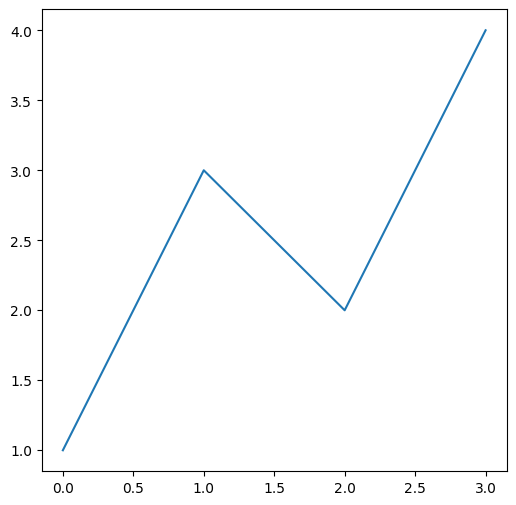

In [106]:
plt.plot ([1, 3, 2, 4]);

If we provide an array as the only argument to `plt.plot()`, then each *column* will be plotted as a separate line.

In the example below, we produce an array with 3 columns, one for sin, one for cos, one for tan. To do this, we concatenate the row vectors for each, then transpose the whole array:


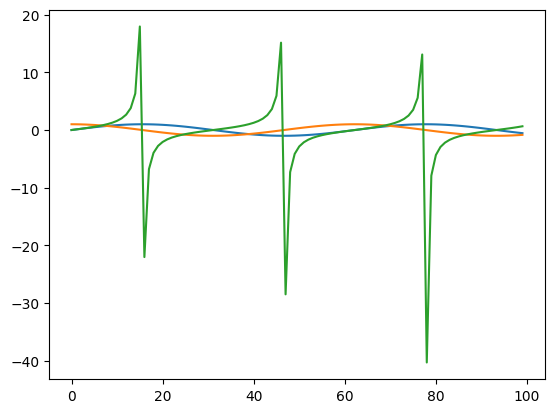

In [49]:
# set up an array of 100 values from 0 to 10:
x = np.linspace(0,10,100)

# compute sin, cos, and tan:
f = np.array([np.sin(x), np.cos(x), np.tan(x)]).transpose()

plt.plot(f);


We can improve the plot in many ways. First, we can specify the values along the *x*-axis by providing them as the *first* argument:

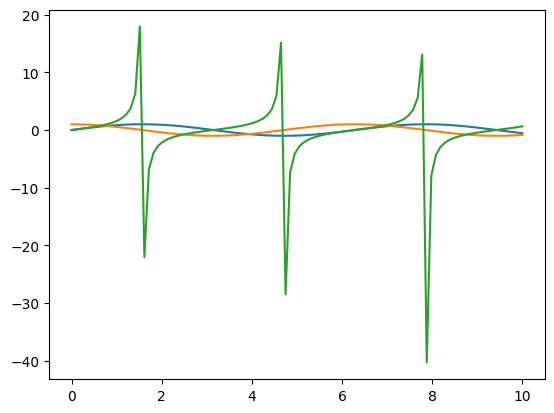

In [50]:
plt.plot(x, f);

We can further refine our plot by adding more lines, axis labels, a title, a legend for each line, and limit the range of the axes, as necessary. We finish with a call to `plt.show()` to request the display of our plot.

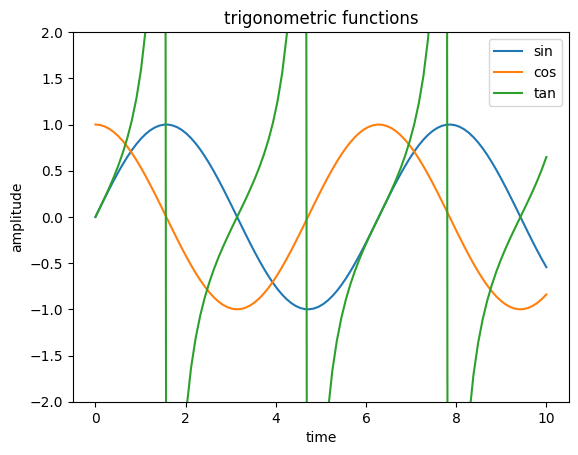

In [51]:
plt.plot(x, f);

# add axis labels:  and legend:
plt.xlabel('time')
plt.ylabel('amplitude')

# add a title:
plt.title ('trigonometric functions')

# add a legend:
plt.legend (( 'sin', 'cos', 'tan' ))

# limit y axis:
plt.ylim (-2,2)

# show the plot:
plt.show()

> 💡 Normally, `matplotlib` does not produce any output until `plt.show()` is invoked. In Google Colab, this is implicitly called at the end of a block of code, so we don't technically need to do this here.

Another way to plot multiple lines is to provide them as triplets of arguments, with each triplet consisting of *x*, *y* and formatting data. For example:

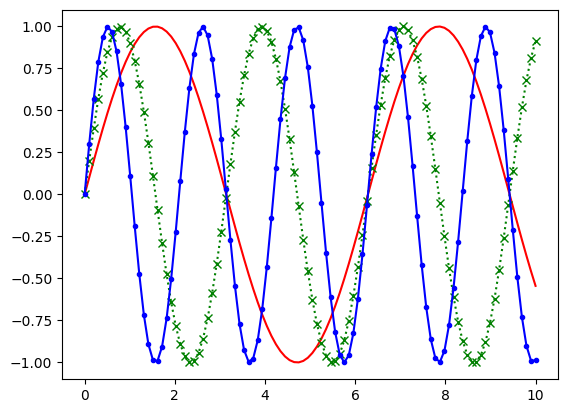

In [52]:
plt.plot (x, np.sin(x), 'r-', x, np.sin(2*x), 'gx:', x, np.sin(3*x), 'b.-');

[See here](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html) for more information about format specifiers.

### Exercise 3

 Plot the following function over the interval [ 0, 5 ]:
 $$
 y = \pi \frac{\log{x}}{x^2}
 $$
Set the range along the *y*-axis to ensure the relevant features of the curve are clearly visible, and add grid lines to your plot.

In [53]:
# write your code here

### Exercise 4

Plot a [bar chart](https://matplotlib.org/stable/gallery/lines_bars_and_markers/bar_colors.html) of stock number of milk, bread, cheese, with the data provided below:

In [54]:
stock_items = ("milk", "bread", "cheese", 'eggs')
no_in_stock = [15,13,9,18]

In [55]:
# write your code here

## Building up more complex plots

There are times when we need to add additional elements to an existing plot. In `matplotlib`, subsequent plotting calls apply to the figure and axes last created. This means we can keep adding to our plot, and finalise it with a final `plt.show()` call.

To illustrate, the example below draws random samples from the Normal distribution, and displays them as a histogram, a scatter plot, and overlays the Normal distribution these were sampled from as a regular line:

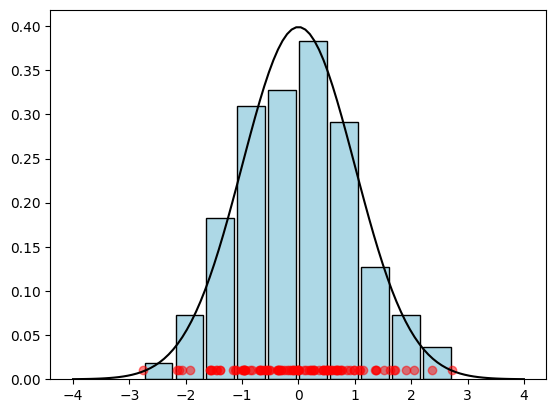

In [56]:
# random data from Normal distribution:
x = np.random.randn (100)

# plot as histogram:
plt.hist (x, density=True, rwidth=0.9, color='lightblue')
# overlay a black outline around histogram:
plt.hist (x, density=True, rwidth=0.9, color='black', fill=False)

# scatter plot for the same samples:
plt.scatter (x, 0.01+np.zeros_like(x), c='r', alpha=0.5)

# add Normal distribution curve:
t = np.linspace (-4,4,100)
plt.plot (t, np.exp(-t**2/2)/np.sqrt(2*np.pi), 'k')
plt.show()

### Exercise 5

Plot last week's stock as well as this week's stock on a [grouped bar chart](https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html#sphx-glr-gallery-lines-bars-and-markers-barchart-py), using the data provided below.

In [57]:
stock_items = ("milk", "bread", "cheese", "eggs")
no_in_stock1 = [15,13,9,18]
no_in_stock2 = [14,14,7,9]

In [58]:
# write your code here

## Using subplots

We can display multiple plots side-by-side if necessary. To do this, we can use the `plt.subplot()` call.

For example, this demonstrates the use of a moving average filter to deal with noise:

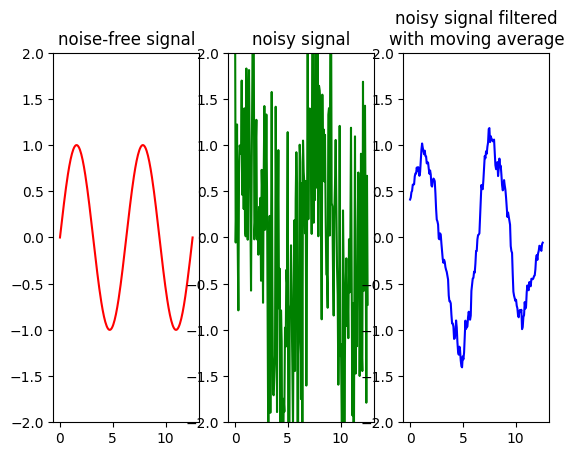

In [59]:
x = np.linspace (0,4*np.pi, 200)

y = np.sin (x)
y_noise = y + np.random.randn (len(x))
y_smooth = np.convolve (y_noise, np.ones(21)/21, mode='same')

plt.subplot (1,3,1)
plt.plot (x, y, 'r-')
plt.ylim (-2,2)
plt.title ('noise-free signal')

plt.subplot (1,3,2)
plt.plot (x, y_noise, 'g-')
plt.ylim (-2,2)
plt.title ('noisy signal')

plt.subplot (1,3,3)
plt.plot (x, y_smooth, 'b-')
plt.ylim (-2,2)
plt.title ('noisy signal filtered\nwith moving average')

plt.show()

As you can see, the default plot size in Google Colab is not always appropriate. We can override this by overriding the default size. In this call below, sizes are provided in inches.

In [60]:
# Make our plots bigger.
plt.rcParams['figure.figsize'] = (12, 6)

Try re-running the previous example to see if this makes any difference.

We can also stack plots vertically or in a grid if necessary.

To illustrate, the example below illustrates the issue of Gibbs ringing that arises from truncating the signal in the Fourier domain:

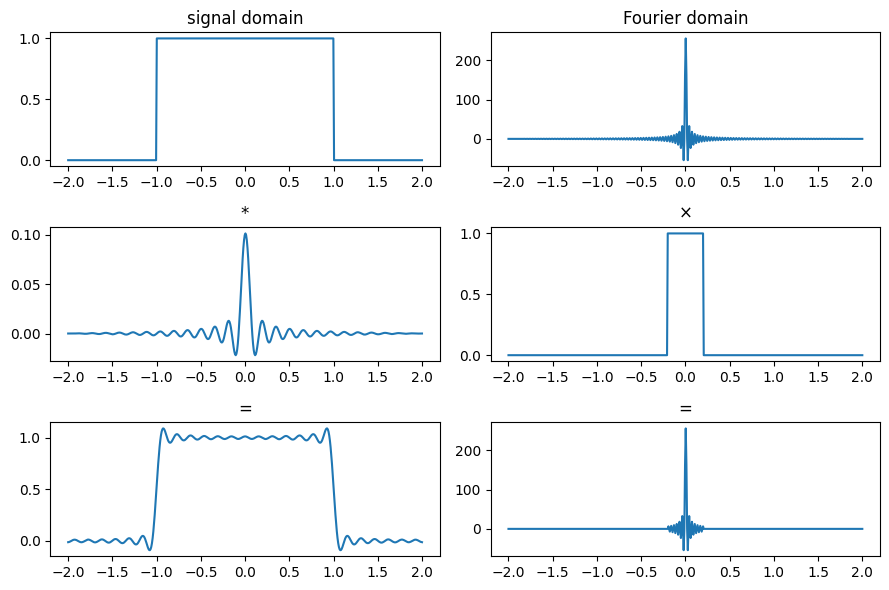

In [61]:
# override figure size:
plt.rcParams['figure.figsize'] = (9, 6)

x = np.linspace (-2,2,512)
s = np.heaviside (x+1,0) * np.heaviside(-x+1,0)

plt.subplot (3,2,1)
plt.plot (x, s)
plt.title ('signal domain')

ft = np.fft.fftshift (np.fft.fft (np.fft.ifftshift(s)))
plt.subplot (3,2,2)
plt.plot (x, ft.real)
plt.title ('Fourier domain')

trunc = np.heaviside (x+0.2,0) * np.heaviside(-x+0.2,0)
plt.subplot (3,2,4)
plt.plot (x, trunc)
plt.title ('×')

plt.subplot (3,2,3)
plt.plot (x, np.fft.ifftshift(np.fft.ifft (np.fft.fftshift(trunc))).real)
plt.title ('*')


ft_truncated = ft * trunc
plt.subplot (3,2,6)
plt.plot (x, ft_truncated.real)
plt.title ('=')


s_truncated = np.fft.ifftshift(np.fft.ifft (np.fft.fftshift(ft_truncated)))
plt.subplot (3,2,5)
plt.plot (x, s_truncated.real)
plt.title ('=')

# sometimes necessary to avoid titles running into adjacent plots:
plt.gcf().tight_layout()
plt.show()

See [the examples page](https://matplotlib.org/stable/plot_types/index.html) for a full list of the capabilities provided by `matplotlib`.


### Exercise 6

Compute a 2D array `M` of size 16×16 over the interval [ -1, 1 ] (along both *x* & *y* axes) containing values computed as:
$$
M(x,y) = \sin(\pi x) * e^{-5\times y^2}
$$

> 💡 You may find the [`np.meshgrid()` function](https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html) handy for this bit.

Plot this function 4 different ways, using a a 2×2 grid of subplots:
- as contour lines
- as filled contours
- as a 3D wireframe
- as a 3D surface


In [62]:
# write your code here

# Handling image data

We often need to manipulate and analyse image data, and Python provides lots of functionality to do this. In the following, we will use the `io` submodule provided by the Scikit `skimage` module to load image data directly from a URL (this can only work because the image can be downloaded openly over the internet!), and store the results in a `numpy` array:

In [63]:
from skimage import io
CT = io.imread ('https://raw.githubusercontent.com/apshortland/IntroPython/main/test_image_CT.jpg')
type (CT)

numpy.ndarray

The simplest way to display image data is to use the `plt.imshow()` function:

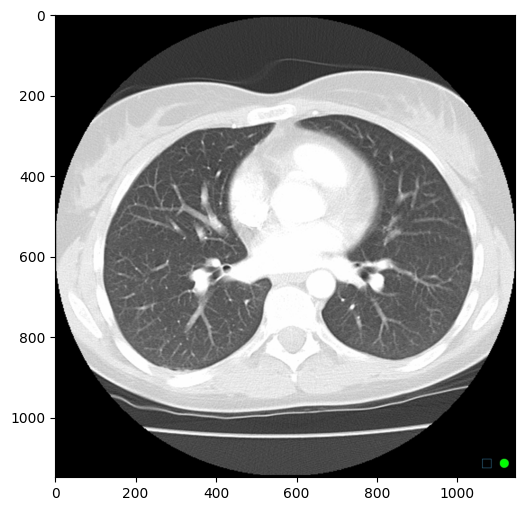

In [64]:
# reset figure size:
plt.rcParams['figure.figsize'] = (6, 6)

plt.imshow (CT);

We can query the dimensions of the image just as we would any `numpy` array:

In [65]:
CT.shape

(1148, 1144, 3)

We can use standard Python indexing functionality to, for example, flip the image upside-down:

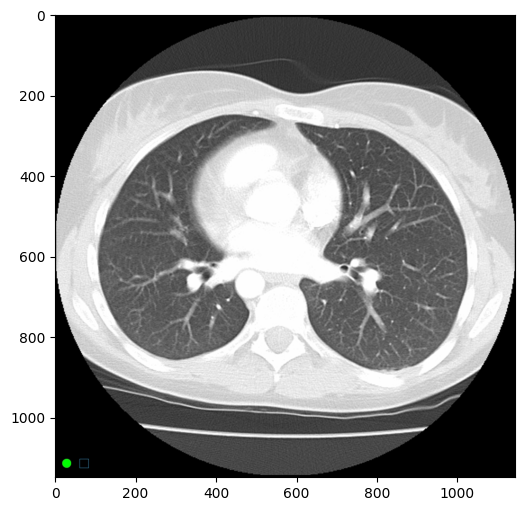

In [66]:
plt.imshow(CT[:,::-1]);

... or left-right:

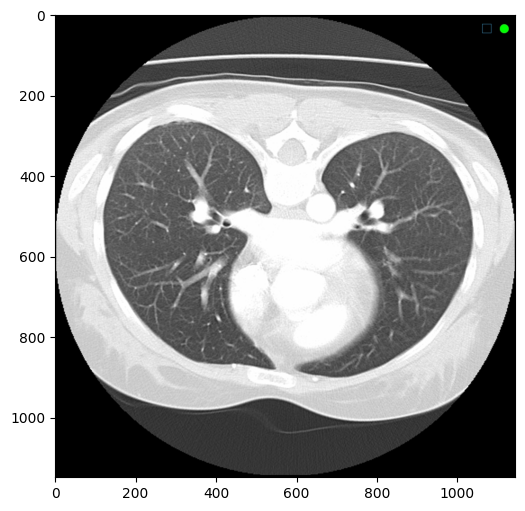

In [67]:
plt.imshow(CT[::-1,:]);

... or to downsample the image to reduce the resolution, by picking out every other pixel in both horizontal and vertical directions:

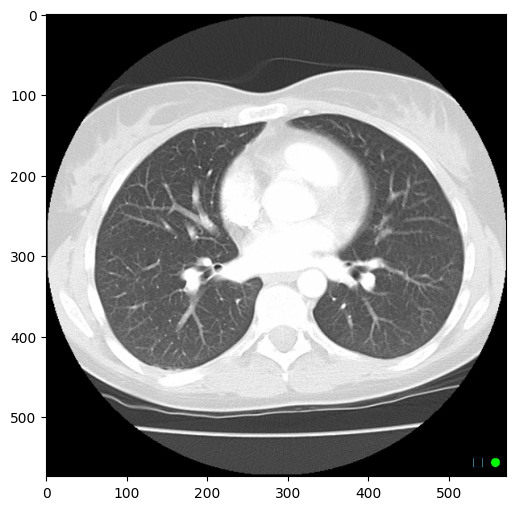

In [68]:
plt.imshow(CT[::2,::2]);

... or to zoom into a small portion of the image:

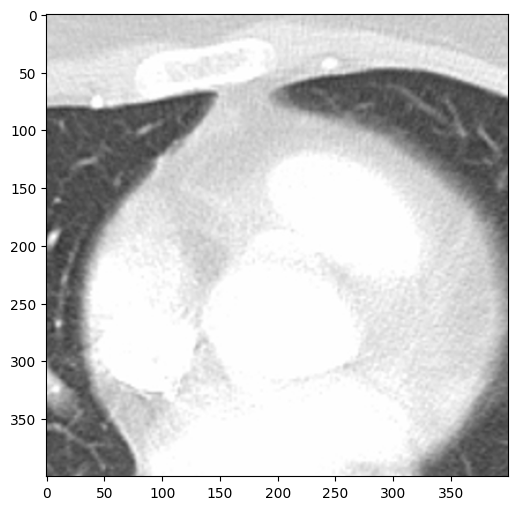

In [69]:
plt.imshow (CT[200:600,400:800]);

We can use the standard `numpy` array functions to extract statistical information from the image:

In [70]:
print (f'min & max = [ {np.min(CT)} {np.max(CT)} ]')
print (f'index of maximum intensity pixel = [ {np.argmax(CT)} ]')
print (f'index of minimum intensity pixel = [ {np.argmin(CT)} ]')
print (f'mean & standard deviation of image = {np.mean(CT)} ± {np.std(CT)}')
print (f'variance of the image = {np.var(CT)}')
print (f'sum of intensities = {np.sum(CT)}')

min & max = [ 0 255 ]
index of maximum intensity pixel = [ 489675 ]
index of minimum intensity pixel = [ 0 ]
mean & standard deviation of image = 122.4838565905639 ± 91.99649723519302
variance of the image = 8463.355503544877
sum of intensities = 482578556


### Exercise 7

Create a threshold level of 100 for pixel values and use it to make a binary version of the CT image and display.

> 💡 There are a few ways of doing this!

In [71]:
# write your code here

In addition to reading and writing images, the SciKit `skimage` module also provides functionality for all kinds of image processing (see [online documentation](https://scikit-image.org/docs/stable/api/api.html) for details).

In the example below, we apply a Gaussian filter to smooth the image and reduce the effects of noise:

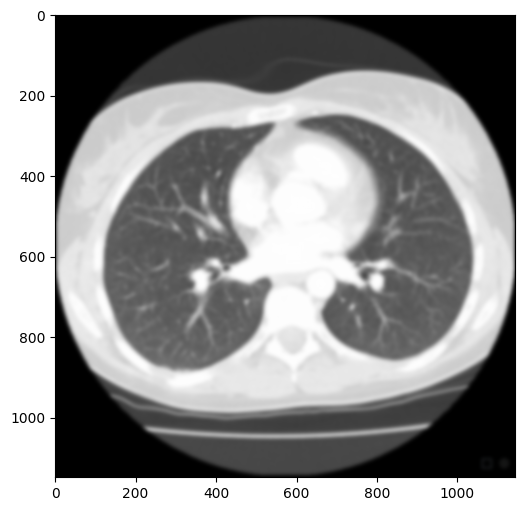

In [72]:
from skimage import filters
plt.imshow (filters.gaussian (CT, sigma=5));

### Exercise 8

Use the Sobel filter to display the x & y gradients of the CT image.

> 💡 To avoid unexpected issues, you may find it helpful to convert the CT array from RGB format to a scalar grayscale image, and store it using a floating-point data type. Don't hesitate to search this up online!

In [73]:
# write your code here